In [1]:
import requests
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

/Users/baart_f/.virtualenvs/main/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# surfline provides a convenient api that can be used to extract camera info
resp = requests.get('http://api.surfline.com/v1/cams/5038')

In [3]:
# the data is returned as json
data = resp.json()

In [4]:
#get the url
url = data['streamInfo']['stream'][0]['file']
url

u'http://livestream.cdn-surfline.com/cdn-live/_definst_/surfline/secure/live/wc-jalamacam.smil/playlist.m3u8?e=1454621380&h=8d46ee4cddbc580bfb1052981db15556'

In [5]:
# let's record 60 seconds
!ffmpeg -y -t 60 -i "$url" test.mp4

ffmpeg version 2.8.5 Copyright (c) 2000-2016 the FFmpeg developers
  built with Apple LLVM version 6.0 (clang-600.0.57) (based on LLVM 3.5svn)
  configuration: --prefix=/opt/local --enable-swscale --enable-avfilter --enable-avresample --enable-libmp3lame --enable-libvorbis --enable-libopus --enable-libtheora --enable-libschroedinger --enable-libopenjpeg --enable-libmodplug --enable-libvpx --enable-libsoxr --enable-libspeex --enable-libass --enable-libbluray --enable-lzma --enable-gnutls --enable-fontconfig --enable-libfreetype --enable-libfribidi --disable-indev=jack --disable-outdev=xv --mandir=/opt/local/share/man --enable-shared --enable-pthreads --cc=/usr/bin/clang --enable-vda --enable-videotoolbox --arch=x86_64 --enable-yasm --enable-gpl --enable-postproc --enable-libx264 --enable-libxvid
  libavutil      54. 31.100 / 54. 31.100
  libavcodec     56. 60.100 / 56. 60.100
  libavformat    56. 40.101 / 56. 40.101
  libavdevice    56.  4.100 / 56.  4.100
  libavfilter     5. 40.101 / 

In [6]:
# open the stream as an opencv device
stream = cv2.VideoCapture('test.mp4')

In [7]:
# we should have some video now, 20s @ 12 fps
!ffprobe test.mp4

ffprobe version 2.8.5 Copyright (c) 2007-2016 the FFmpeg developers
  built with Apple LLVM version 6.0 (clang-600.0.57) (based on LLVM 3.5svn)
  configuration: --prefix=/opt/local --enable-swscale --enable-avfilter --enable-avresample --enable-libmp3lame --enable-libvorbis --enable-libopus --enable-libtheora --enable-libschroedinger --enable-libopenjpeg --enable-libmodplug --enable-libvpx --enable-libsoxr --enable-libspeex --enable-libass --enable-libbluray --enable-lzma --enable-gnutls --enable-fontconfig --enable-libfreetype --enable-libfribidi --disable-indev=jack --disable-outdev=xv --mandir=/opt/local/share/man --enable-shared --enable-pthreads --cc=/usr/bin/clang --enable-vda --enable-videotoolbox --arch=x86_64 --enable-yasm --enable-gpl --enable-postproc --enable-libx264 --enable-libxvid
  libavutil      54. 31.100 / 54. 31.100
  libavcodec     56. 60.100 / 56. 60.100
  libavformat    56. 40.101 / 56. 40.101
  libavdevice    56.  4.100 / 56.  4.100
  libavfilter     5. 40.101 /

In [8]:
# read the first frame
status, img = stream.read()
# create an array of the same shape
sum = np.zeros_like(img, dtype='float32')
# we're reading 200 frames as an example
n = 700
for i in range(n):
    # read the img
    status, img = stream.read()
    # keep a running mean
    cv2.accumulateWeighted(img, sum, 1.0/n)

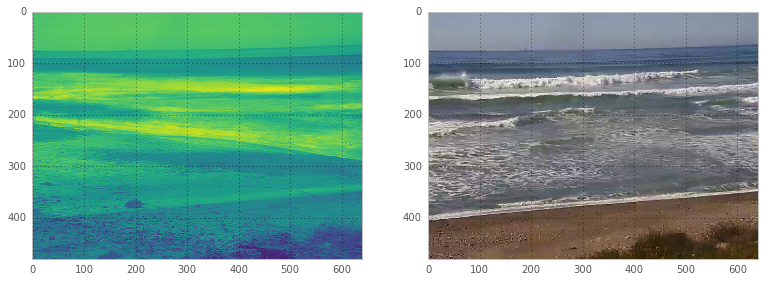

In [10]:
# show the mean intensity 
fig, axes = plt.subplots(1, 2, figsize=(13,8))
axes[0].imshow(cv2.cvtColor(cv2.convertScaleAbs(sum), cv2.COLOR_BGR2GRAY), cmap='viridis')
axes[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))